In [1]:
import sys
sys.path.insert(0, '../Src/')

### Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from Model_RegLog import Model_RegLog

### Data read and prepare

In [3]:
# Importation des données
df_train = pd.read_csv('..\data\predictive_maintenance_train_resampled.csv')
df_test = pd.read_csv('..\data\predictive_maintenance_test_resampled.csv')
df_val = pd.read_csv('..\data\predictive_maintenance_validation.csv')

# Séparation des données en X et y
name_target_col = list(filter(lambda ligne: 'Failure' in ligne, df_train.columns))
X_train = df_train.drop(columns=name_target_col).to_numpy()
y_train = df_train[name_target_col]
X_test = df_test.drop(columns=name_target_col).to_numpy()
y_test = df_test[name_target_col]
X_val = df_val.drop(columns=name_target_col).to_numpy()
y_val = df_val[name_target_col]

# Transformation des données  y en array
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)
y_val = np.argmax(y_val, axis=1)

### Fit LogRegression Model

In [6]:
model = Model_RegLog()
model.train(X_train, y_train)



### Performance of model in test dataset

In [ ]:
y_pred = model.predict(X_test)


Confusion matrix, without normalization
[[   8   10    0    0    0]
 [   1 1542    0    0    0]
 [   1    8    4    0    0]
 [   0    4    1   10    0]
 [   0    7    0    0    0]]


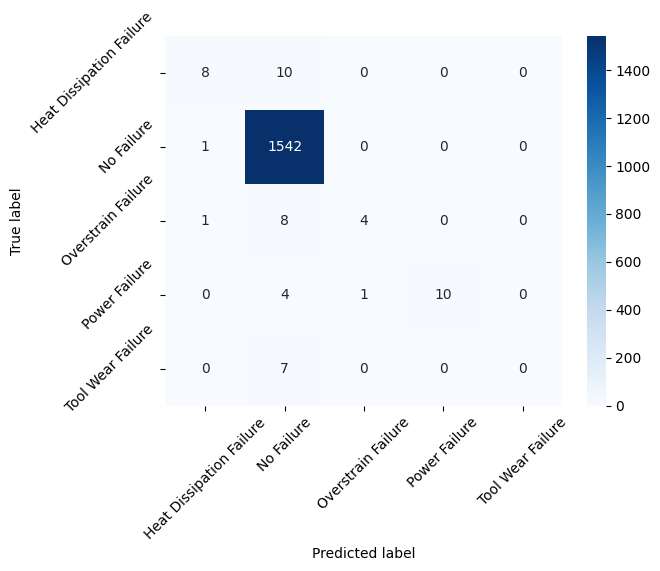

In [7]:
model.plot_confusion_matrix(y_test, y_pred, name_target_col)

In [9]:
model.print_evaluation(X_test, y_test, y_pred, verbose=0)


{'accuracy': 0.9799498746867168,
 'precision': 0.9799498746867168,
 'recall': 0.9799498746867168,
 'AUC': 0.9839289030069012,
 'kappa': 0.5839958295321257,
 'F1_score': 0.9799498746867168}

### Performance of model in validation dataset

In [14]:
y_pred_val = model.predict(X_val)
score_details=model.print_evaluation(X_val, y_val, y_pred_val, verbose=0)
df_score = pd.DataFrame(score_details, index=[0])
df_score

,accuracy,precision,recall,AUC,kappa,F1_score
0,0.978947,0.978947,0.978947,0.984415,0.569586,0.978947


Confusion matrix, without normalization
[[  12   10    0    0    0]
 [   3 1925    0    1    0]
 [   0   11    5    0    0]
 [   0    7    1   11    0]
 [   0    9    0    0    0]]


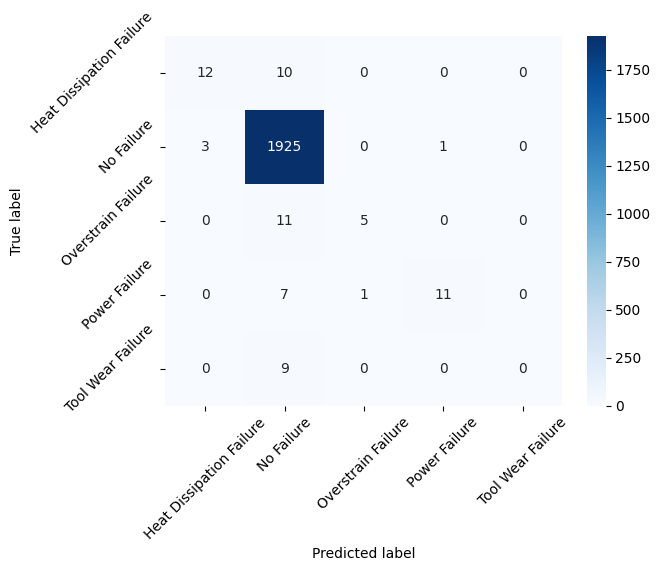

In [11]:
model.plot_confusion_matrix(y_val, y_pred_val, name_target_col)